In [102]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from imdb import IMDb
from tqdm.notebook import tqdm
import json

In [2]:
plt.rcParams["figure.figsize"] = (16, 16)

In [3]:
imdb = IMDb()

In [4]:
df = pd.read_csv("network_metadata.tab", sep="\t", index_col="GexfID")
df.loc[:, "IMDB_id"] = df["IMDB_id"].str[2:]  # Remove "tt" from IMDB_id

In [22]:
df.head()

,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
GexfID,,,,,,,,,,,,,
1,10 Things I Hate About You,0147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567","3,000","0,233",225,25
2,12,0488478,2007,12,"4,227","0,517","2,170","3,000","0,610","6,000","0,077",102,42
3,Twelve and Holding,0417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593","2,000","0,140",139,26
5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339","4,000","0,152",33,11
6,1492: Conquest of Paradise,0103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705","1,000","0,153",164,34


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ReleaseDate,773.0,1994.873221,13.540841,1915.0,1991.0,1998.0,2003.0,2012.0
Edges,773.0,230.282018,120.475260,7.0,150.0,204.0,291.0,906.0
Characters,773.0,36.688228,15.301963,5.0,26.0,35.0,45.0,117.0


In [23]:
df[df["ReleaseDate"] > 2005].sort_values(by="Edges")

,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
GexfID,,,,,,,,,,,,,
5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339","4,000","0,152",33,11
569,Moon,1182345,2009,Moon,"8,462","0,166","1,667","3,000","0,587","2,000","0,346",70,12
824,Timber Falls,0857295,2007,Timber-Falls,"11,800","0,069","1,333","2,000","0,674","2,000","0,533",83,10
100,The Bad Lieutenant: Port of Call - New Orleans,1095217,2009,The-Bad-Lieutenant:-Port-of-Call---New-Orleans,"4,091","0,476","1,930","3,000","0,714","6,000","0,089",87,37
883,While She Was Out,0887971,2008,While-She-Was-Out,"7,789","0,319","1,813","3,000","0,653","1,000","0,246",93,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2012,1190080,2009,2012,"10,600","0,438","2,519","5,000","0,647","3,000","0,089",470,69
764,Speed Racer,0811080,2008,Speed-Racer,"11,823","0,378","2,361","5,000","0,697","4,000","0,089",506,64
249,Defiance,1034303,2008,Defiance,"12,029","0,299","2,006","4,000","0,630","7,000","0,109",509,57


In [65]:
df[df["Title"].str.contains("Boondock")]

,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
GexfID,,,,,,,,,,,,,
150,The Boondock Saints II: All Saints Day,1300851,2009,The-Boondock-Saints-II:-All-Saints-Day,"9,930","0,425","2,511","5,000","0,631","8,000","0,098",374,54
151,The Boondock Saints,0144117,1999,The-Boondock-Saints,"9,524","0,371","2,159","3,000","0,559","5,000","0,116",245,40


In [66]:
graph_id = 151

In [67]:
G = nx.read_gexf("gexf/{}.gexf".format(graph_id), relabel=True)

<IPython.core.display.Javascript object>


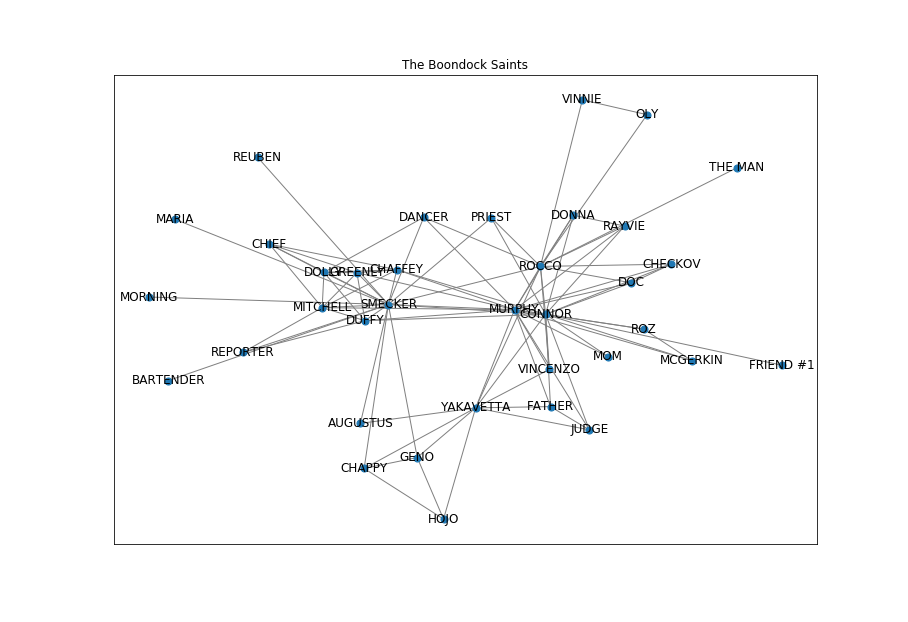

In [68]:
# %matplotlib inline
%matplotlib notebook
#--> interactive mode
nx.draw_networkx(G, with_labels=True, node_size=50, fontsize=12, edge_color="grey")
plt.title(df.loc[graph_id, "Title"])
plt.show()

In [134]:
gexf_additional_metadata = {}  # gexfID -> metadata
for graph_id in tqdm(df.index):
    movie_id = int(df.loc[graph_id]["IMDB_id"])
    movie = imdb.get_movie(movie_id)
    movie_dict = {"movie_id": movie_id}
    movie_dict["genres"] = movie.get("genres", [])
    movie_dict["runtime_min"] = movie.get("runtimes", [None])[0]
    movie_dict["box_office"] = movie.get("box office", {})
    movie_dict["imdb_rating"] = movie.get("rating")
    movie_dict["imdb_votes"] = movie.get("votes")
    movie_dict["directors"] = [d["name"] for d in movie.get("directors", []) if "name" in d]
    movie_dict["writers"] = [w["name"] for w in movie.get("writers", []) if "name" in w]
    cam = {}
    for a in movie.get("cast", []):
        if not isinstance(a.currentRole, (list, tuple)):
            for n in G.nodes:
                if n.lower() in a.currentRole.get("name", "").lower():
                    cam[a.currentRole["name"]] = {n: a["name"]}
        else:
            for b in a.currentRole:
                for n in G.nodes:
                    if n.lower() in b.get("name", "").lower():
                        cam[b["name"]] = {n: a["name"]}
    movie_dict["character_actor_mapping"] = cam
    gexf_additional_metadata[graph_id] = movie_dict

2020-01-30 11:42:18,326 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0086979/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(-3, 'Temporary failure in name resolution'))},); kwds: {}
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/pyth

2020-01-30 11:42:18,331 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/__init__.py:737: caught an exception retrieving or parsing "plot" info set for mopID "0086979" (accessSystem: http)
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http

2020-01-30 11:42:18,336 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0221027/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(-3, 'Temporary failure in name resolution'))},); kwds: {}
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/py

2020-01-30 11:42:18,339 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/__init__.py:737: caught an exception retrieving or parsing "main" info set for mopID "0090756" (accessSystem: http)
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http

2020-01-30 11:42:18,345 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0106447/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(-3, 'Temporary failure in name resolution'))},); kwds: {}
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/pyth

2020-01-30 11:42:18,348 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/__init__.py:737: caught an exception retrieving or parsing "plot" info set for mopID "0106447" (accessSystem: http)
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http

2020-01-30 11:42:18,354 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0082089/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(-3, 'Temporary failure in name resolution'))},); kwds: {}
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/py

2020-01-30 11:42:18,361 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/__init__.py:737: caught an exception retrieving or parsing "main" info set for mopID "0106453" (accessSystem: http)
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http

2020-01-30 11:42:18,370 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0103855/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(-3, 'Temporary failure in name resolution'))},); kwds: {}
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/pyth

2020-01-30 11:42:18,374 CRITICAL [imdbpy] /home/idan/HU/DATA16001_-_Network_Analysis/.venv/lib/python3.7/site-packages/imdb/__init__.py:737: caught an exception retrieving or parsing "plot" info set for mopID "0103855" (accessSystem: http)
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1252, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1298, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1247, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/usr/lib/python3.7/http

In [140]:
with open("gexf_imdb_metadata.json", "w") as f:
    json.dump(gexf_additional_metadata, f)

In [69]:
movie = imdb.get_movie(df.loc[graph_id, "IMDB_id"])

In [70]:
movie["genres"], movie["runtimes"], movie["box office"], movie["rating"], movie["votes"], movie["directors"], movie["writers"]

(['Action', 'Crime', 'Thriller'],
 ['108'],
 {'Budget': '$7,000,000 (estimated)',
  'Opening Weekend United States': '$19,930, 21 Jan 2000'},
 7.8,
 220706,
 [<Person id:0240627[http] name:_Troy Duffy_>],
 [<Person id:0240627[http] name:_Troy Duffy_>])